# DNA Sequence 101

Understanding DNA Sequences with Python

## Objectives

In this lesson, we'll:
- Learn what DNA is and what it's made of
- Represent DNA sequences in Python
- Implement basic operations (length, counting nucleotide bases, complement, reverse complement)
- Build a `DNASequence` python class

## Deoxyribonucleic Acid (DNA)

DNA (Deoxyribonucleic Acid) is made up of **four bases**:
- `A`: Adenine
- `T`: Thymine
- `G`: Guanine
- `C`: Cytosine

Each base pairs with it's **complement**:
|Base|Complement|
|---|---|
|A|T|
|T|A|
|G|C|
|C|G|

Sp a DNA strand like `A T G C` pairs with `T A C G`

DNA Sequences are written as strings of these letters:
`ATGCGTACGTTAGC`

In [56]:
# Since DNA is just a sequence of these nucleotides, it can simply be represented as a string (which is essentially a list of characters) in Python
dna_sequence = "ATGCGTACGTTAGC"

print("DNA Sequence:", dna_sequence)
print("Length:", len(dna_sequence))
print("Bases:", set(dna_sequence))

DNA Sequence: ATGCGTACGTTAGC
Length: 14
Bases: {'A', 'C', 'G', 'T'}


In [57]:
BASES = ['A', 'T', 'G', 'C']

## Counting Nucleotides

Counting each base is useful for **sequence analysis**, detecting motifs, or computing composition.

In [58]:
def count_nucleotides(seq: str) -> dict[str, int]:
    """Count the number of nucleotides in the given DNA sequence"""
    counts = { base: seq.count(base) for base in BASES }
    return counts

Alternatively, if Python comprehensions are too much magic, you can simply do it like:

```py
def count_nucleotides(seq: str) -> dict[str, int]:
    """Count the number of nucleotides in the given DNA sequence"""
    counts = {"A": 0, "T": 0, "G": 0, "C": 0}
    for base in BASES:
        counts[base] = seq.count(base)
    return counts
```

### What is this `: str` and `-> dict[str, int]` stuff in my Python?

These are type annotations. They are a (relatively) recent addition to Python. 
// TODO: Explain this better. Dynamic vs Strict Typing.

In [59]:
count_nucleotides('ATGCGTACGTTAGC')

{'A': 3, 'T': 4, 'G': 4, 'C': 3}

## Generating Random DNA Sequences

Turns out that the only requirement for a valid DNA sequence is to only have these nucleotides. The order does not matter. Since we will need a lot of DNA sequences in the following lessons, let's create a simple helper function to generate random DNA sequences

In [60]:
# We'll need to import the `random` module from the Python standard library to be able to select bases randomly
import random

In [61]:
def generate_random_sequence(length: int = 12) -> str:
    """Generates a random DNA sequence of given length"""
    seq = [random.choice(BASES) for _ in range(length)]
    return "".join(seq)

In [62]:
# Generate a random DNA sequence of length 12 (default)
seq = generate_random_sequence()
seq

'CTGCGGGAAATG'

In [63]:
# Generate a much larger sequence
seq = generate_random_sequence(1000)
seq

'GAGTCGGGGGGAGCGGACGGGTCCAGCTGAGCCCTATCTCAATGCCGATCAGATTGGTTTACCATTCGAGTTCTACGGTCTACGGCCCTCTATGGTTCGTGGTACGGGGCTTGCCCAGACGCTTTGATTGGCAACGCCATAACGCATCATTCCATTGAGCGGTGACACGTTTAGTTCGCCACCTCTGTAGGAGGAATAACCGAATCGTCTAAGAGACGGGGGATTATCATTTCTACCCTAGACAGTTGTTGATTAGCTACCTTGTGAGTTTAGGGTACGCGGAAGTCCCGATGTTATTAAACTAGACAGGGAATTACGGGCTTCGGTATGCTACAGCGGAGTGAAGTTGTCCCGTCACTAGAGAGTCGGTTGTACGTTCGGTCCCTATTACAATCCCCTAGCATATCCGCCGGGCGCTGTGACAGTGGCTAGAGCCCTTCCTCTCTCGCCGGTCATAATGAAAAGCGTTAGAACAAGACAGGCCCGAAGTAGGCTTGAGGAAGCTTGCCGTCTCGAGAGTCGCTCGCAGAGAGTGTCGCGTAGCCAGAATGGTAAATCCACTCTTAAAGTTTCGGATCCTTGAGAACCGCCGCGCCCGGAGGGCCGTGCGGCCCAGGCATGAAGGGACATGCGCGCGCGAGGTCGACAAGGTCCTCGTCCCTCGTGGGGTCCGGCACAGCAATAATTAGAGGGGATGCTTGCACAAAGCCCCTCGGCTCGAACCGGGCACTGCGACGAAATGGTTTTCCGCATTCAAAACGGTTTGAGGTAAAATCCCAATGTAAGTCTCCCCCTGAAACGCAAATACTCTCAAGTGCTGCCCACGGCAGGTCGGAGCTATTTCATTGGGTAGAAGCAATCAACGACCCGTCTATTATGTGGAGATGTTAGTGCCATTCTTTCCCAAGGGATGCTAATTACGTAAATAGACAGCAGCCACCTACCCCGGACACATACACAGACCCCGAACCATCGGTAGTTCCACATTATGGGAGGGCT

Nice. Now that we have a way to generate (reasonably large) DNA sequences, we can performing operations on them. Let's start by revisiting the `count_nucleotides` function

In [64]:
bases = count_nucleotides(seq)
bases

{'A': 237, 'T': 228, 'G': 275, 'C': 260}

In [65]:
print("=" * 4, "Nucleotide Counts", "=" * 4)
print("Adenine ", bases['A'], sep='\t\t')
print("Thymine ", bases['T'], sep='\t\t')
print("Guanine ", bases['G'], sep='\t\t')
print("Cytosine", bases['C'], sep='\t\t')

==== Nucleotide Counts ====
Adenine 		237
Thymine 		228
Guanine 		275
Cytosine		260


We can see that out randomly generated DNA sequence has an almost uniform spread of the 4 bases. On a side note, we will need the full-names of the bases from time-to-time, so let's create a helper function to translate between the short-code and the full-name.

In [66]:
BASE_NAMES = {
    "A": "Adenine",
    "T": "Thymine",
    "G": "Guanine",
    "C": "Cytosine"
}

## Validating DNA Sequences

Now that we have a way to generate DNA sequences, we should also create a function to check if a given sequence is a valid DNA or not. This is easy enough as the only check we need to perform is to make sure that sequence only contains the four bases and nothing else.

In [67]:
def is_valid(seq: str) -> bool:
    """Checks whether the given sequence is a valid DNA sequence or not"""
    return all(base in BASES for base in seq)

In [68]:
is_valid(seq)

True

In [69]:
is_valid("NOTAVALIDDNA")

False

## Complement

Each DNA strand pairs with a complementary strand.

In [70]:
BASE_COMPLEMENTS = {
    "A": "T",
    "T": "A",
    "G": "C",
    "C": "G"
}

In [71]:
def complement(seq: str) -> str:
    """Generates the complement for the given DNA sequence"""
    complement = [BASE_COMPLEMENTS[base] for base in seq]
    return "".join(complement)

In [72]:
complement("ACGTGAC")

'TGCACTG'

In [73]:
complement(seq)

'CTCAGCCCCCCTCGCCTGCCCAGGTCGACTCGGGATAGAGTTACGGCTAGTCTAACCAAATGGTAAGCTCAAGATGCCAGATGCCGGGAGATACCAAGCACCATGCCCCGAACGGGTCTGCGAAACTAACCGTTGCGGTATTGCGTAGTAAGGTAACTCGCCACTGTGCAAATCAAGCGGTGGAGACATCCTCCTTATTGGCTTAGCAGATTCTCTGCCCCCTAATAGTAAAGATGGGATCTGTCAACAACTAATCGATGGAACACTCAAATCCCATGCGCCTTCAGGGCTACAATAATTTGATCTGTCCCTTAATGCCCGAAGCCATACGATGTCGCCTCACTTCAACAGGGCAGTGATCTCTCAGCCAACATGCAAGCCAGGGATAATGTTAGGGGATCGTATAGGCGGCCCGCGACACTGTCACCGATCTCGGGAAGGAGAGAGCGGCCAGTATTACTTTTCGCAATCTTGTTCTGTCCGGGCTTCATCCGAACTCCTTCGAACGGCAGAGCTCTCAGCGAGCGTCTCTCACAGCGCATCGGTCTTACCATTTAGGTGAGAATTTCAAAGCCTAGGAACTCTTGGCGGCGCGGGCCTCCCGGCACGCCGGGTCCGTACTTCCCTGTACGCGCGCGCTCCAGCTGTTCCAGGAGCAGGGAGCACCCCAGGCCGTGTCGTTATTAATCTCCCCTACGAACGTGTTTCGGGGAGCCGAGCTTGGCCCGTGACGCTGCTTTACCAAAAGGCGTAAGTTTTGCCAAACTCCATTTTAGGGTTACATTCAGAGGGGGACTTTGCGTTTATGAGAGTTCACGACGGGTGCCGTCCAGCCTCGATAAAGTAACCCATCTTCGTTAGTTGCTGGGCAGATAATACACCTCTACAATCACGGTAAGAAAGGGTTCCCTACGATTAATGCATTTATCTGTCGTCGGTGGATGGGGCCTGTGTATGTGTCTGGGGCTTGGTAGCCATCAAGGTGTAATACCCTCCCGA

## Reverse Compliment

In [74]:
def reverse_complement(seq: str) -> str:
    """Returns the reverse complement of the given DNA sequence"""
    return complement(seq)[::-1]

In [75]:
reverse_complement("ACGTGAC")

'GTCACGT'

In [76]:
reverse_complement(seq)

'GAGCCCTCCCATAATGTGGAACTACCGATGGTTCGGGGTCTGTGTATGTGTCCGGGGTAGGTGGCTGCTGTCTATTTACGTAATTAGCATCCCTTGGGAAAGAATGGCACTAACATCTCCACATAATAGACGGGTCGTTGATTGCTTCTACCCAATGAAATAGCTCCGACCTGCCGTGGGCAGCACTTGAGAGTATTTGCGTTTCAGGGGGAGACTTACATTGGGATTTTACCTCAAACCGTTTTGAATGCGGAAAACCATTTCGTCGCAGTGCCCGGTTCGAGCCGAGGGGCTTTGTGCAAGCATCCCCTCTAATTATTGCTGTGCCGGACCCCACGAGGGACGAGGACCTTGTCGACCTCGCGCGCGCATGTCCCTTCATGCCTGGGCCGCACGGCCCTCCGGGCGCGGCGGTTCTCAAGGATCCGAAACTTTAAGAGTGGATTTACCATTCTGGCTACGCGACACTCTCTGCGAGCGACTCTCGAGACGGCAAGCTTCCTCAAGCCTACTTCGGGCCTGTCTTGTTCTAACGCTTTTCATTATGACCGGCGAGAGAGGAAGGGCTCTAGCCACTGTCACAGCGCCCGGCGGATATGCTAGGGGATTGTAATAGGGACCGAACGTACAACCGACTCTCTAGTGACGGGACAACTTCACTCCGCTGTAGCATACCGAAGCCCGTAATTCCCTGTCTAGTTTAATAACATCGGGACTTCCGCGTACCCTAAACTCACAAGGTAGCTAATCAACAACTGTCTAGGGTAGAAATGATAATCCCCCGTCTCTTAGACGATTCGGTTATTCCTCCTACAGAGGTGGCGAACTAAACGTGTCACCGCTCAATGGAATGATGCGTTATGGCGTTGCCAATCAAAGCGTCTGGGCAAGCCCCGTACCACGAACCATAGAGGGCCGTAGACCGTAGAACTCGAATGGTAAACCAATCTGATCGGCATTGAGATAGGGCTCAGCTGGACCCGTCCGCTCCCCCCGACT

## Basic Text Visualization

Let's do some basic visualization of the DNA sequences, because these long strings are ugly to look at.

In [77]:
def visualize(seq: str, reverse: bool = False):
    """Prints a simple text-based visualization of the DNA strand"""
    top = seq
    connector = "".join("|" for _ in range(len(top)))
    bottom = reverse_complement(seq) if reverse else complement(seq)
    print(f"5' {top} 3'")
    print(f"   {connector}   ")
    print(f"3' {bottom} 5'")

In [78]:
visualize("ACGTGACTTAC")

5' ACGTGACTTAC 3'
   |||||||||||   
3' TGCACTGAATG 5'


In [79]:
visualize(seq)

5' GAGTCGGGGGGAGCGGACGGGTCCAGCTGAGCCCTATCTCAATGCCGATCAGATTGGTTTACCATTCGAGTTCTACGGTCTACGGCCCTCTATGGTTCGTGGTACGGGGCTTGCCCAGACGCTTTGATTGGCAACGCCATAACGCATCATTCCATTGAGCGGTGACACGTTTAGTTCGCCACCTCTGTAGGAGGAATAACCGAATCGTCTAAGAGACGGGGGATTATCATTTCTACCCTAGACAGTTGTTGATTAGCTACCTTGTGAGTTTAGGGTACGCGGAAGTCCCGATGTTATTAAACTAGACAGGGAATTACGGGCTTCGGTATGCTACAGCGGAGTGAAGTTGTCCCGTCACTAGAGAGTCGGTTGTACGTTCGGTCCCTATTACAATCCCCTAGCATATCCGCCGGGCGCTGTGACAGTGGCTAGAGCCCTTCCTCTCTCGCCGGTCATAATGAAAAGCGTTAGAACAAGACAGGCCCGAAGTAGGCTTGAGGAAGCTTGCCGTCTCGAGAGTCGCTCGCAGAGAGTGTCGCGTAGCCAGAATGGTAAATCCACTCTTAAAGTTTCGGATCCTTGAGAACCGCCGCGCCCGGAGGGCCGTGCGGCCCAGGCATGAAGGGACATGCGCGCGCGAGGTCGACAAGGTCCTCGTCCCTCGTGGGGTCCGGCACAGCAATAATTAGAGGGGATGCTTGCACAAAGCCCCTCGGCTCGAACCGGGCACTGCGACGAAATGGTTTTCCGCATTCAAAACGGTTTGAGGTAAAATCCCAATGTAAGTCTCCCCCTGAAACGCAAATACTCTCAAGTGCTGCCCACGGCAGGTCGGAGCTATTTCATTGGGTAGAAGCAATCAACGACCCGTCTATTATGTGGAGATGTTAGTGCCATTCTTTCCCAAGGGATGCTAATTACGTAAATAGACAGCAGCCACCTACCCCGGACACATACACAGACCCCGAACCATCGGTAGTTCCACATTATGGGAGGG

## GC Content

GC content measures the percentage of **Guanine (G)** and **Cytosine (C)** in a DNA sequence. High GC content affects **DNA Stability** and **melting temperature**.

G-C pairs have 3 hydrogen bonds vs 2 for A-T pairs, which is why they are more stable and have higher melting point. The quantity of GC content in a strand can indicate its stability

In [80]:
def gc_content(seq: str) -> float:
    """Calculate the ratio of GC content in the DNA sequence"""
    gc_count = seq.count('G') + seq.count('C')
    return gc_count / len(seq)

In [81]:
gc_content(seq)

0.535

We may want this as a percentage, so let's add that as an option

In [82]:
def gc_content(seq: str, as_percentage: bool = False) -> float:
    """Calculate the ratio of GC content in the DNA sequence"""
    gc_count = seq.count('G') + seq.count('C')
    gc_content = gc_count / len(seq)
    return gc_content * 100 if as_percentage else gc_content

In [83]:
gc_content(seq, as_percentage=True)

53.5

## DNA Sequence Class

Let's combine all this into a single DNA class

In [84]:
class DNASequence:
    def __init__(self, sequence: str):
        self.sequence = DNASequence.clean(sequence)
        self.validate() # Ensure that the DNA sequence is valid

    @staticmethod
    def clean(seq: str) -> str:
        seq = seq.replace("\n", "")
        seq = seq.replace(" ", "")
        seq = seq.upper()
        return seq
    
    @staticmethod
    def random(length: int = 12):
        """Generates a random DNA sequence of given length"""
        seq = [random.choice(BASES) for _ in range(length)]
        return DNASequence("".join(seq))

    def validate(self) -> bool:
        """Ensure that the DNA sequence is valid"""
        for base in self.sequence:
            if base not in BASES:
                raise ValueError(f"Invalid base: {base}")
        return True

    def count_nucleotides(self) -> dict[str, int]:
        """Counts the number of nucleotides in the DNA sequence"""
        return {base: self.sequence.count(base) for base in BASES}

    def count_bases(self) -> dict[str, int]:
        """Alias for `count_nucleotides`"""
        return self.count_nucleotides()

    def complement(self, reverse: bool = False):
        """Returns the complement or reverse-complement of the DNA sequence"""
        seq = self.sequence.translate(str.maketrans("ATGC", "TACG"))
        if reverse:
            seq = seq[::-1]
        return DNASequence(seq)

    def count(self, base: str) -> int:
        """Returns the count of the given base in the DNA sequence"""
        return self.sequence.count(base)

    def gc_content(self, as_percentage: bool = False) -> float:
        """Calculate the ratio of GC content in the DNA sequence"""
        gc_count = self.count('G') + self.count('C')
        gc_content = gc_count / len(self)
        return gc_content * 100 if as_percentage else gc_content

    def visualize(self, reverse: bool = False):
        """Prints a simple text-based visualization of the DNA strand"""
        top = self.sequence
        connector = "".join("|" for _ in range(len(top)))
        bottom = self.complement(reverse)
        print(f"5' {top} 3'")
        print(f"   {connector}   ")
        print(f"3' {bottom} 5'")

    def __len__(self):
        """Returns the length of the DNA Sequence"""
        return len(self.sequence)

    def __repr__(self):
        return f"<DNASequence(length={len(self.sequence)})?"

    def __str__(self):
        return self.sequence

In [85]:
seq = DNASequence('ACGTGCTACGATAACGT')
seq

<DNASequence(length=17)?

In [86]:
seq.count_nucleotides()

{'A': 5, 'T': 4, 'G': 4, 'C': 4}

In [87]:
len(seq)

17

In [88]:
print(seq.complement())

TGCACGATGCTATTGCA


In [89]:
print(seq.complement(reverse=True))

ACGTTATCGTAGCACGT


In [90]:
seq.visualize()

5' ACGTGCTACGATAACGT 3'
   |||||||||||||||||   
3' TGCACGATGCTATTGCA 5'


In [91]:
seq.gc_content()

0.47058823529411764

In [92]:
seq.gc_content(as_percentage=True)

47.05882352941176

In [93]:
print(DNASequence('at\ncGA cta')) # Should automatically convert to uppercase and handle whitespace

ATCGACTA


## Visualization

Time to do visualization justice

In [94]:
import svgwrite
from IPython.display import SVG, display

In [95]:
def to_svg(seq: DNASequence, filename: str = None):
    """Generate a simple 2D SVG visualization of the DNA double strand"""
    dwg = svgwrite.Drawing(size=(len(seq) * 40 + 120, 120))
    base_colors = {"A": "#1f77b4", "T": "#ff7f0e", "G": "#2ca02c", "C": "#d62728"}

    complement = seq.complement()
    for i, (top, bottom) in enumerate(zip(seq.sequence, complement.sequence)):
        x = 60 + i * 40
        y1, y2 = 30, 90

        # Base letters
        dwg.add(dwg.text(top, insert=(x, y1), fill=base_colors[top], font_size="20px", text_anchor="middle"))
        dwg.add(dwg.text(bottom, insert=(x, y2), fill=base_colors[bottom], font_size="20px", text_anchor="middle"))

        # Connecting Line
        dwg.add(dwg.line(start=(x, y1+10), end=(x, y2 - 20), stroke="gray", stroke_width=1.5))

    # 5' and 3' labels
    dwg.add(dwg.text("5'", insert=(10, y1), font_size="16px"))
    dwg.add(dwg.text("3'", insert=(x+40, y1), font_size="16px"))
    dwg.add(dwg.text("3'", insert=(10, y2), font_size="16px"))
    dwg.add(dwg.text("5'", insert=(x+40, y2), font_size="16px"))

    # Save as filename, if specified
    if filename:
        dwg.saveas(filename)

    return dwg



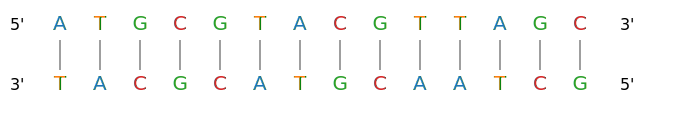

In [96]:
seq = DNASequence("ATGCGTACGTTAGC")
svg = to_svg(seq)
display(svg)

In [97]:
import numpy as np
import plotly.graph_objects as go

In [98]:
def show_double_helix_3d(seq: DNASequence, turns=2, radius=1.0, height_per_turn=3.4, rotate=True):
    """
    Visualize a 3D DNA double helix using Plotly.
    turns: number of helical turns to show
    radius: radius of the helix
    height_per_turn: height per helical twist (in arbitrary units)
    rotate: if True, creates a slow rotation animation
    """
    bases = list(seq.sequence)
    n = len(bases)
    theta = np.linspace(0, 2 * np.pi * turns, n)

    # Create two helices (offset by pi)
    x1 = radius * np.cos(theta)
    y1 = radius * np.sin(theta)
    z1 = np.linspace(0, turns * height_per_turn, n)

    x2 = radius * np.cos(theta + np.pi)
    y2 = radius * np.sin(theta + np.pi)
    z2 = z1 # Same height

    # Connector base pairs
    connectors = []
    for i in range(n):
        connectors.append(go.Scatter3d(
            x = [x1[i], x2[i]],
            y = [y1[i], y2[i]],
            z = [z1[i], z2[i]],
            mode = "lines",
            line = dict(color="gray", width=3),
            showlegend = False
        ))


    # Strands
    strand1 = go.Scatter3d(
        x = x1, y = y1, z = z1,
        mode = "lines+markers+text",
        line = dict(color="blue", width=12),
        text = bases,
        textposition = "top center",
        name = "Strand 1"
    )

    strand2 = go.Scatter3d(
        x = x2, y = y2, z = z2,
        mode = "lines+markers",
        line = dict(color="red", width=12),
        name = "Strand 2"
    )

    side_camera = dict(
        eye=dict(x=2, y=0, z=0) # Move along the x-axis facing the helix sideways
    )

    fig = go.Figure(data=[strand1, strand2] + connectors)
    fig.update_layout(
        title = "3D DNA Double Helix",
        scene = dict(
            xaxis = dict(visible=False),
            yaxis = dict(visible=False),
            zaxis = dict(visible=False),
        ),
        scene_camera=side_camera,
        showlegend = False,
        height = 800
    )

    if rotate:
        # Create frames for rotation
        frames = []
        for angle in np.linspace(0, 2 * np.pi, 360): # 360 frames for full rotation
            camera = dict(
                eye = dict(
                    x = 2 * np.cos(angle),
                    y = 2 * np.sin(angle),
                    z = 0.5, # Small tilt for better perspective
                )
            )
            frames.append(go.Frame(layout=dict(scene_camera=camera)))

        fig.frames = frames
        
        fig.update_layout(
            updatemenus=[dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=60, redraw=True))]
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[[None], dict(mode="immediate", frame=dict(duration=0, redraw=False))]
                    )
                ]
            )]
        )

    fig.show()

In [99]:
show_double_helix_3d(seq)

In [100]:
def show_double_helix_3d(seq: DNASequence, max_bases_display=128, rotate=True):
    """
    Visualize a 3D DNA double helix using Plotly, dynamically scaled to adjust for size.
    seq: DNASequence (must have .sequence)
    max_bases_display: maximum number of bases to display at once (for performance)
    rotate: if True, creates a slow rotation animation
    """
    bases = list(seq.sequence)
    n_total = len(seq)

    # If the sequence is too large, take a centered slice
    if n_total > max_bases_display:
        start = (n_total - max_bases_display) // 2
        end = start + max_bases_display
        bases = bases[start:end]
        n = max_bases_display
        title_suffix = f"(showing {n} of {n_total} bases)"
    else:
        n = n_total
        title_suffix = f"({n} bases)"   

    # Adjust the helix parameters dynamically
    turns = max(1, int(n / 64)) # ~20 bases per turn
    radius = 0.5 # DNA radius ~1 arbitrary unit
    height_per_turn = 360 # distance between turns
    total_height = turns * height_per_turn

    theta = np.linspace(0, 2 * np.pi * turns, n)

    # Create two helices (offset by pi)
    x1 = radius * np.cos(theta)
    y1 = radius * np.sin(theta)
    z1 = np.linspace(0, turns * height_per_turn, n)

    x2 = radius * np.cos(theta + np.pi)
    y2 = radius * np.sin(theta + np.pi)
    z2 = z1 # Same height

    # Connector base pairs
    connectors = []
    for i in range(n):
        connectors.append(go.Scatter3d(
            x = [x1[i], x2[i]],
            y = [y1[i], y2[i]],
            z = [z1[i], z2[i]],
            mode = "lines",
            line = dict(color="gray", width=6),
            showlegend = False
        ))


    # Strands
    strand1 = go.Scatter3d(
        x = x1, y = y1, z = z1,
        mode = "lines+markers+text",
        line = dict(color="blue", width=12),
        text = bases,
        textposition = "top center",
        name = "Strand 1"
    )

    strand2 = go.Scatter3d(
        x = x2, y = y2, z = z2,
        mode = "lines+markers",
        line = dict(color="red", width=12),
        name = "Strand 2"
    )
    
    # Initial Perspective Camera
    side_camera = dict(
        eye=dict(x=2, y=0, z=0) # Move along the x-axis facing the helix sideways
    )

    # Basic Figure
    fig = go.Figure(data=[strand1, strand2] + connectors)
    fig.update_layout(
        title = f"3D DNA Double Helix {title_suffix}",
        scene = dict(
            xaxis = dict(visible=False),
            yaxis = dict(visible=False),
            zaxis = dict(visible=False),
            aspectratio=dict(x=1, y=1, z=2),
        ),
        scene_camera=side_camera,
        showlegend = False,
        height = 800
    )

    if rotate:
        # Create frames for rotation
        frames = []
        for angle in np.linspace(0, 2 * np.pi, 360): # 360 frames for full rotation
            camera = dict(
                eye = dict(
                    x = 2 * np.cos(angle),
                    y = 2 * np.sin(angle),
                    z = 0.5, # Small tilt for better perspective
                )
            )
            frames.append(go.Frame(layout=dict(scene_camera=camera)))

        fig.frames = frames
        
        fig.update_layout(
            updatemenus=[dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=60, redraw=True))]
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[[None], dict(mode="immediate", frame=dict(duration=0, redraw=False))]
                    )
                ]
            )]
        )

    fig.show()

In [101]:
seq = DNASequence(generate_random_sequence(1000))
show_double_helix_3d(seq)

## Hamming Distance

Hamming distance counts differences between two DNA sequences. They must be of the same length.

Use din genetics for **mutation analysis** and **similarity comparisons**.

In [104]:
class DNASequence(DNASequence): # We extend the existing class to make out lives easier
    def hamming_distance(self, other: DNASequence) -> int:
        """Compare two sequences of equal length"""
        if len(self.sequence) != len(other.sequence):
            raise ValueError("Sequences must be of equal length")
        return sum(a != b for a, b in zip(self.sequence, other.sequence))

In [105]:
seq = DNASequence(seq.sequence)

In [106]:
len(seq)

13

In [107]:
other = DNASequence("GTCGACATAGCAC")
other

<DNASequence(length=13)?

In [108]:
seq.hamming_distance(other)

9

## FASTA Representation

`FASTA` is a standard format for storing sequences: A **header** line starting with `>` followed by the sequence. Commonly used in **bioinformatics tools** and databases.

In [109]:
class DNASequence(DNASequence):
    def set_name(self, name: str):
        """Set a friendly-name for this sequence"""
        self.name = name

    def to_fasta(self, name: str) -> str:
        """Return a FASTA-formatted string"""
        name = name if name is not None else self.name
        return f">{name}\n{self.sequence}"
        

In [111]:
seq = DNASequence.random(12)
print(seq)

TTGGGACAATAG


In [112]:
print(seq.to_fasta(name="Test"))

>Test
TTGGGACAATAG
